# Image classification using CNN

The goal is to build a CNN classifier to predict given image is belong to a cat or dog. The training dataset containing 4000 images for each class and in test dataset 1000 for a class. Data used in this notebook can be download from [here](https://drive.google.com/open?id=1_-h2gIKuNHPSA0cKKlzMSNYLj64fgJlj)

In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
# Set up working directory
import os
os.chdir("Path to working directory")

In [3]:
# Initialising the CNN 
classifier = Sequential()

 We add layers via the .add() method.

In [4]:
# Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

Now, We add pooling layer, it is used to reduce the spatial dimensions.

In [5]:
# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

Flattening is to convert all the resultant 2-dimensional arrays into a single long continuous linear vector.

In [6]:
# Flattening
classifier.add(Flatten())

Now the output of Flattening layer becomes an input of ANN. We are building very simple CNN with 10 epoch for demonstration. 

In [7]:
# Add Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [8]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [9]:
# Fitting the CNN to the images
from keras.preprocessing.image import ImageDataGenerator

In [10]:
# Applies a transformation to an images according to given parameters.
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [11]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [13]:
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [14]:
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 2000 images belonging to 2 classes.


In [15]:
# Fit the model
classifier.fit_generator(training_set,
                         steps_per_epoch = 8000,
                         epochs = 10,
                         validation_data = test_set,
                         validation_steps = 2000)

Epoch 1/10
8000/8000 [==============================] - 2271s 284ms/step - loss: 0.4694 - acc: 0.7701 - val_loss: 0.5465 - val_acc: 0.7745
Epoch 2/10
8000/8000 [==============================] - 2188s 273ms/step - loss: 0.3203 - acc: 0.8585 - val_loss: 0.7508 - val_acc: 0.7565
Epoch 3/10
8000/8000 [==============================] - 2199s 275ms/step - loss: 0.2375 - acc: 0.8995 - val_loss: 0.8331 - val_acc: 0.7715
Epoch 4/10
8000/8000 [==============================] - 2467s 308ms/step - loss: 0.1863 - acc: 0.9229 - val_loss: 1.0389 - val_acc: 0.7535
Epoch 5/10
8000/8000 [==============================] - 2451s 306ms/step - loss: 0.1572 - acc: 0.9365 - val_loss: 1.1314 - val_acc: 0.7595
Epoch 6/10
8000/8000 [==============================] - 2584s 323ms/step - loss: 0.1333 - acc: 0.9458 - val_loss: 1.2402 - val_acc: 0.7500
Epoch 7/10
8000/8000 [==============================] - 2349s 294ms/step - loss: 0.1192 - acc: 0.9526 - val_loss: 1.4039 - val_acc: 0.7480
Epoch 8/10
8000/8000 [=====

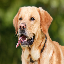

In [20]:
# Making new predictions
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image

In [ ]:
# Convert image into the array and pass through our CNN classifier
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

In [ ]:
# Assign labels to predicted probabilities
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

In [18]:
# print a predicted label 
print (prediction)

'dog'

Wow! We can see with very less epoch we can achieve 96.49 % Accuracy. Still, there are many ways we can improve the accuracy of the model with an increasing number of epochs and parameter tuning etc...

**That is all for this demonstration. I hope you enjoyed the notebook, and see you in the next one.**